# Importing Packages

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

In [225]:
data = pd.read_csv("C:\\Users\SUSHMITA\Downloads\loan\loan_data.csv", error_bad_lines=False, index_col=False, dtype='unicode')

C:\Users\SUSHMITA\AppData\Local\Temp\ipykernel_11772\1518524882.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("C:\\Users\SUSHMITA\Downloads\loan\loan_data.csv", error_bad_lines=False, index_col=False, dtype='unicode')


In [226]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [227]:
data.shape

(39717, 111)

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [229]:
## Data Cleaning
### 1. Checklist for fixing rows
### 2. Checklist for fixing columns
### 3.Checklist for missing values
### 4.Checklist for standardise values
### 5. Checklist for fixing invalid values
### 6. Checklist for filtering data

In [230]:
percent_missing = data.isnull().sum() * 100 / len(data)
df_missing_value = pd.DataFrame({'column_name':data.columns, 'percent_missing':percent_missing.round(2)})
df_missing_value.sort_values('percent_missing', inplace=True)

In [231]:
(df_missing_value['percent_missing']==100.00).sum()

54

In [232]:
#List of columns with null values
missing_value_cols = df_missing_value[(df_missing_value['percent_missing']==100.00)].column_name.tolist()
missing_value_cols

['num_bc_sats',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'mort_acc',
 'num_bc_tl',
 'num_tl_op_past_12m',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'mo_sin_rcnt_tl',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'verification_status_joint',
 'mo_sin_old_il_acct',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'total_bc_limit',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_ut

In [233]:
#Dropping columns with all missing value
null_columns_dropped_df = data.drop(missing_value_cols, axis=1)

In [234]:
## Deleting column with all values as same. So not adding any importance in analysis
null_columns_dropped_df = null_columns_dropped_df.drop(['desc','member_id','id','url','next_pymnt_d',
                                                            'mths_since_last_record',
                                                            'mths_since_last_delinq','delinq_amnt','acc_now_delinq',
                                                            'application_type','policy_code','pymnt_plan','initial_list_status',
                                                           'chargeoff_within_12_mths','tax_liens','collections_12_mths_ex_med'],axis=1)

In [235]:
## Deleting string columns having most of as unique values
null_columns_dropped_df = null_columns_dropped_df.drop(['emp_title'],axis=1)
## Check the percentage of missing data 
((null_columns_dropped_df.isnull().sum()*100/len(null_columns_dropped_df)).sort_values(ascending=False)).head(20)

emp_length                2.71
pub_rec_bankruptcies      1.75
last_pymnt_d              0.18
revol_util                0.13
title                     0.03
last_credit_pull_d        0.01
total_pymnt               0.00
pub_rec                   0.00
revol_bal                 0.00
total_acc                 0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_rec_prncp           0.00
total_pymnt_inv           0.00
inq_last_6mths            0.00
total_rec_int             0.00
total_rec_late_fee        0.00
recoveries                0.00
collection_recovery_fee   0.00
last_pymnt_amnt           0.00
dtype: float64

In [236]:
#Identifying categorical columns

In [237]:
new_list = []
for row in null_columns_dropped_df.columns.tolist():
    new_list.append({'column':row, 'count':len(null_columns_dropped_df[row].unique())})

In [238]:
unique = pd.DataFrame(new_list).sort_values('count')

In [239]:
unique.head(20)

,column,count
3,term,2
13,loan_status,3
11,verification_status,3
39,pub_rec_bankruptcies,4
23,pub_rec,5
9,home_ownership,5
6,grade,7
21,inq_last_6mths,9
19,delinq_2yrs,11
8,emp_length,12


In [240]:
#Creating derived columns


In [241]:
null_columns_dropped_df['term_months'] = null_columns_dropped_df['term'].str.rstrip('months')
del null_columns_dropped_df['term']

In [242]:
null_columns_dropped_df['int_rate_percentage'] = null_columns_dropped_df['int_rate'].str.rstrip('%')
del null_columns_dropped_df['int_rate']


In [243]:
null_columns_dropped_df['emp_length_years'] = null_columns_dropped_df['emp_length'].str.rstrip('years ')
null_columns_dropped_df['emp_length_years'].replace({'10+':'10'}, inplace=True)
null_columns_dropped_df['emp_length_years'][null_columns_dropped_df['emp_length_years'] == '<1'] = '0.5'
del null_columns_dropped_df['emp_length']

In [244]:
null_columns_dropped_df['revol_util_percentage']  = null_columns_dropped_df['revol_util'].str.rstrip('%')
del null_columns_dropped_df['revol_util']

In [245]:
null_columns_dropped_df['issue_d_month'], null_columns_dropped_df['issue_d_year'] = null_columns_dropped_df[
    'issue_d'].str.split('-').str

null_columns_dropped_df['last_credit_pull_d_month'], null_columns_dropped_df['last_credit_pull_d_year'] = null_columns_dropped_df[
    'last_credit_pull_d'].str.split('-').str

null_columns_dropped_df['last_pymnt_d_month'], null_columns_dropped_df['last_pymnt_d_year'] = null_columns_dropped_df[
    'last_pymnt_d'].str.split('-').str

null_columns_dropped_df['earliest_cr_line_month'], null_columns_dropped_df['earliest_cr_line_year'] = null_columns_dropped_df[
    'earliest_cr_line'].str.split('-').str

C:\Users\SUSHMITA\AppData\Local\Temp\ipykernel_11772\2817493030.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_df['issue_d_month'], null_columns_dropped_df['issue_d_year'] = null_columns_dropped_df[
C:\Users\SUSHMITA\AppData\Local\Temp\ipykernel_11772\2817493030.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_df['last_credit_pull_d_month'], null_columns_dropped_df['last_credit_pull_d_year'] = null_columns_dropped_df[
C:\Users\SUSHMITA\AppData\Local\Temp\ipykernel_11772\2817493030.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_df['last_pymnt_d_month'], null_columns_dropped_df['last_pymnt_d_year'] = null_columns_dropped_df[
C:\Users\SUSHMITA\AppData\Local\Temp\ipykernel_11772\2817493030.py:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases

In [246]:
null_columns_dropped_df['issue_d_year'] = '20' + null_columns_dropped_df['issue_d_year']

In [169]:
## Updated column datatype

In [247]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'emp_length_years',
          'revol_util_percentage']
null_columns_dropped_df[columns] = null_columns_dropped_df[columns].astype('float')

ValueError: could not convert string to float: '< 1'

In [248]:
columns_dict = {'loan_amnt':float, 'funded_amnt':float,'funded_amnt_inv':float, 'installment':float, 'annual_inc':float, 'dti':float, 
          'revol_bal':float, 'out_prncp':float, 'out_prncp_inv':float, 'total_pymnt':float, 'total_pymnt_inv':float, 'total_rec_prncp':float, 'total_rec_int':float,
          'total_rec_late_fee':float, 'recoveries':float, 'collection_recovery_fee':float, 'int_rate_percentage':float, 'revol_util_percentage':float}

for field, new_datatype in columns_dict.items():
    print(field)
    null_columns_dropped_df[field] = null_columns_dropped_df[field].astype(new_datatype)

    
    
#'emp_length_years':float, 

loan_amnt
funded_amnt
funded_amnt_inv
installment
annual_inc
dti
revol_bal
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
int_rate_percentage
revol_util_percentage


In [249]:
# Creating a profit and loss column
null_columns_dropped_df['PnL']=(
    null_columns_dropped_df['total_pymnt']-null_columns_dropped_df['funded_amnt']
)*100/null_columns_dropped_df['funded_amnt']

In [250]:
null_columns_dropped_df['loan_inc_ratio'
                         ] = null_columns_dropped_df.funded_amnt*100/null_columns_dropped_df.annual_inc

In [251]:
columns = ['total_acc', 'term_months', 'issue_d_year']
null_columns_dropped_df[columns] = null_columns_dropped_df[columns].astype(np.int)

C:\Users\SUSHMITA\AppData\Local\Temp\ipykernel_11772\4100973735.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  null_columns_dropped_df[columns] = null_columns_dropped_df[columns].astype(np.int)


In [252]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
null_columns_dropped_df[columns] = null_columns_dropped_df[columns].apply(lambda x: x.astype('category'))

In [253]:
null_columns_dropped_df['annual_inc_lakhs'] = null_columns_dropped_df['annual_inc'] / 1000

In [254]:
null_columns_dropped_df['annual_inc_lakhs'].describe()

count   39,717.00
mean        68.97
std         63.79
min          4.00
25%         40.40
50%         59.00
75%         82.30
max      6,000.00
Name: annual_inc_lakhs, dtype: float64

In [255]:
null_columns_dropped_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,revol_util_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,PnL,loan_inc_ratio,annual_inc_lakhs
0,"5,000.00","5,000.00","4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,"13,648.00",9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,36,10.65,10,83.70,Dec,2011,May,16,Jan,15,Jan,85,17.26,20.83,24.00
1,"2,500.00","2,500.00","2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,"1,687.00",4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,60,15.27,< 1,9.40,Dec,2011,Sep,13,Apr,13,Apr,99,-59.65,8.33,30.00
2,"2,400.00","2,400.00","2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,"2,956.00",10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,36,15.96,10,98.50,Dec,2011,May,16,Jun,14,Nov,01,25.24,19.59,12.25
3,"10,000.00","10,000.00","10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,"5,598.00",37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,36,13.49,10,21.00,Dec,2011,Apr,16,Jan,15,Feb,96,22.32,20.33,49.20
4,"3,000.00","3,000.00","3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,"27,783.00",38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0,60,12.69,1,53.90,Dec,2011,May,16,May,16,Jan,96,17.11,3.75,80.00


In [256]:
#Count of Categorical and Numeric columns

In [257]:
numeric_data = null_columns_dropped_df.select_dtypes(include = [np.number])

categorical_data = null_columns_dropped_df.select_dtypes(exclude = [np.number, np.object])

string_data = null_columns_dropped_df.select_dtypes(include = [np.object])


C:\Users\SUSHMITA\AppData\Local\Temp\ipykernel_11772\1696037892.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_data = null_columns_dropped_df.select_dtypes(exclude = [np.number, np.object])
C:\Users\SUSHMITA\AppData\Local\Temp\ipykernel_11772\1696037892.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  string_data = null_columns_dropped_df.select_dtypes(include = [np.object])


In [259]:
null_columns_dropped_df = null_columns_dropped_df[null_columns_dropped_df.loan_status !='Current']
null_columns_dropped_df = null_columns_dropped_df.loc[:,null_columns_dropped_df.nunique()!=1]

In [260]:
df = null_columns_dropped_df

In [261]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

In [262]:
#Univariate Analysis

In [263]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

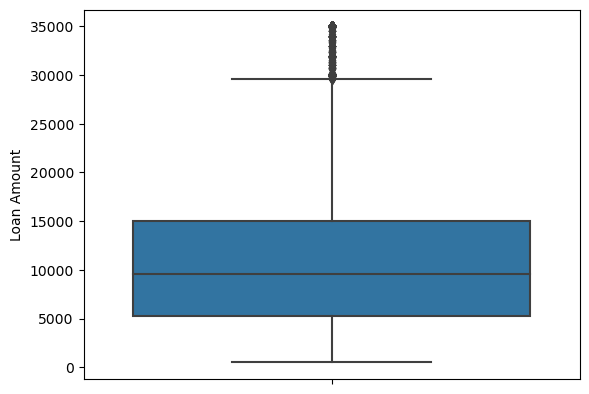

In [264]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

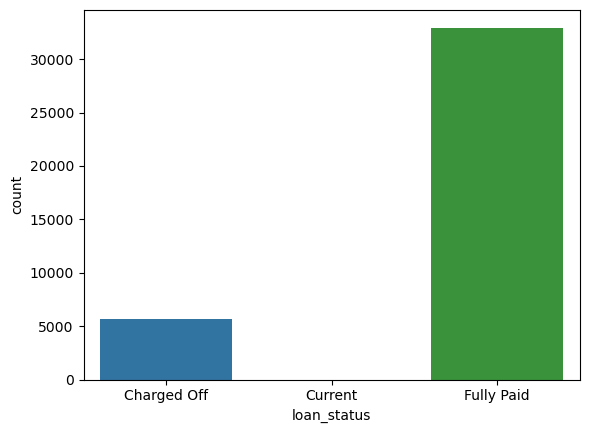

In [265]:
sns.countplot(x= null_columns_dropped_df["loan_status"])
plt.show()

In [266]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

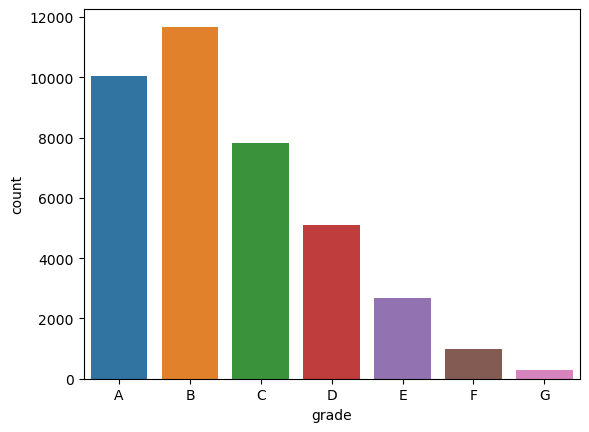

In [267]:
sns.countplot(x='grade', data=df)
plt.show()

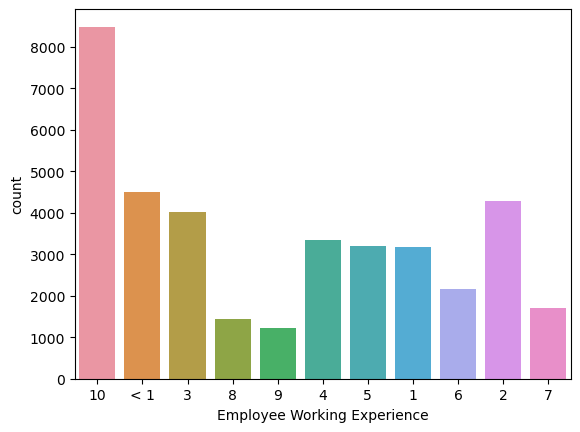

In [268]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

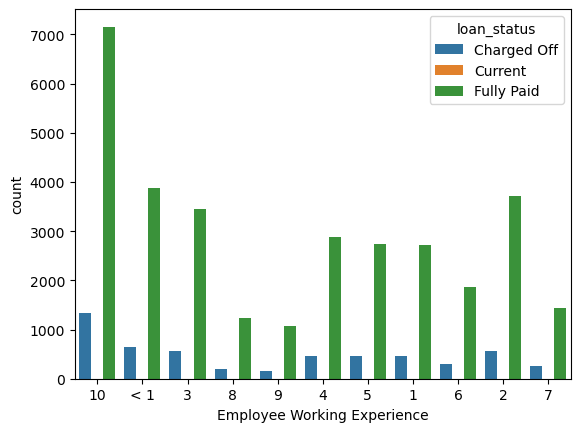

In [269]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

C:\Users\SUSHMITA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


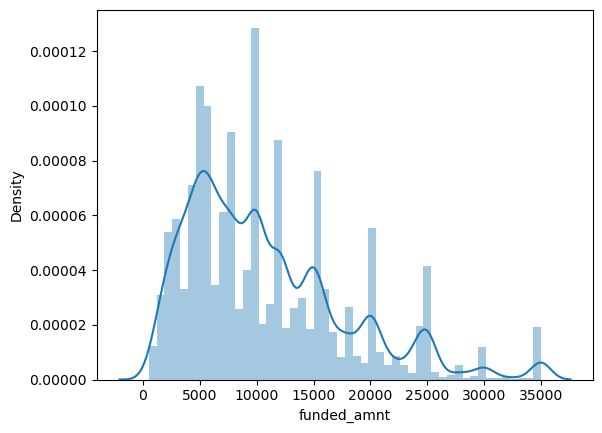

In [270]:
sns.distplot(df['funded_amnt'])
plt.show()

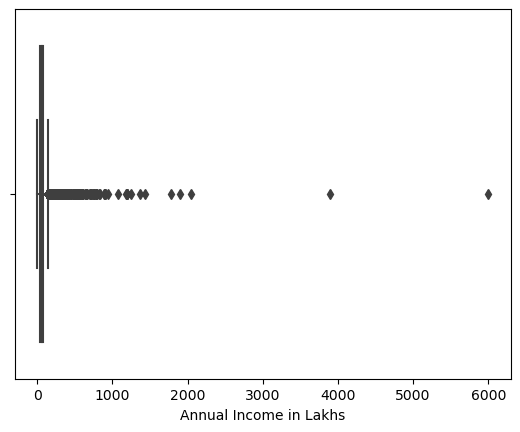

In [271]:
sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

C:\Users\SUSHMITA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


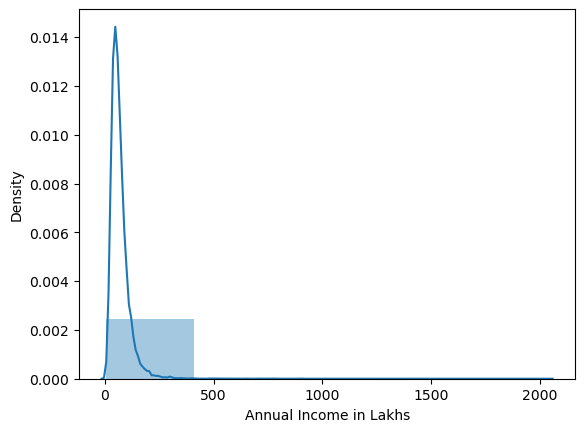

In [272]:
sns.distplot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

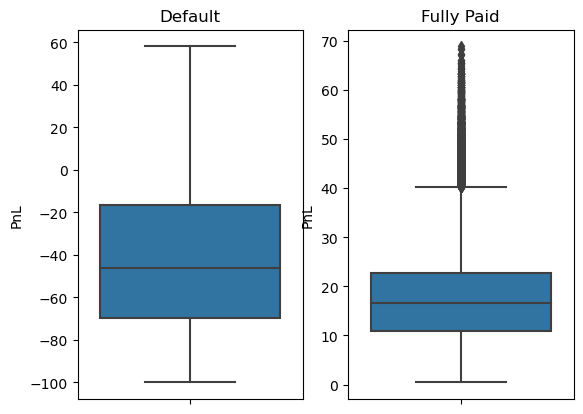

In [273]:
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

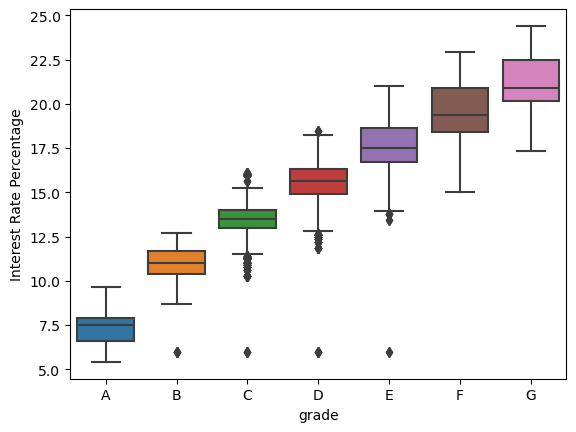

In [274]:
sns.boxplot(y='int_rate_percentage', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

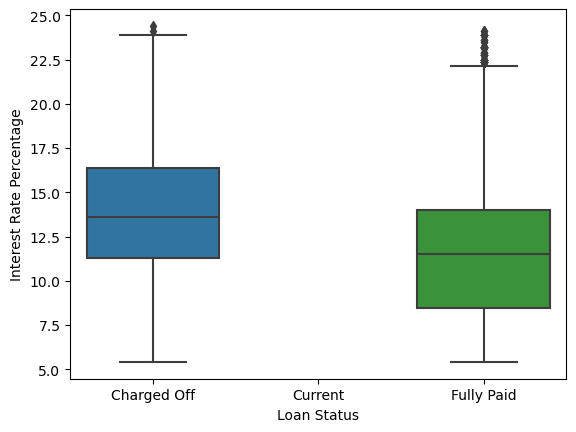

In [275]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

In [276]:

#Segmented Univariate Analysis

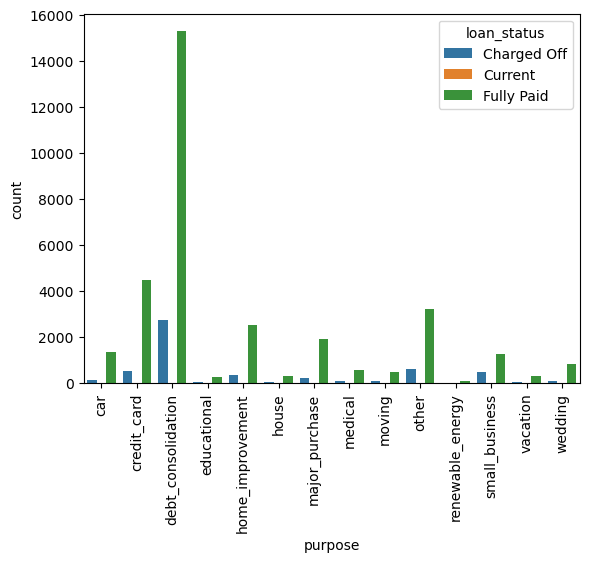

In [277]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

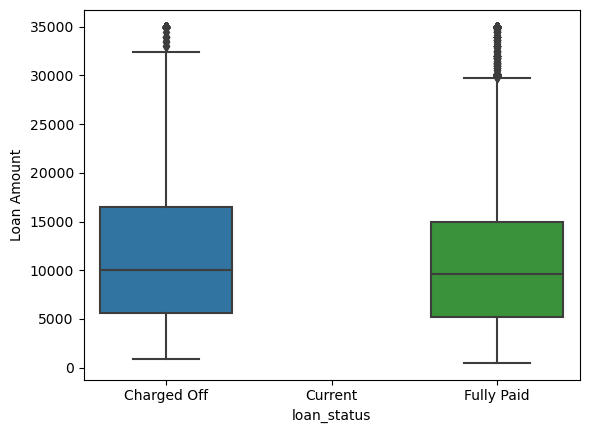

In [278]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

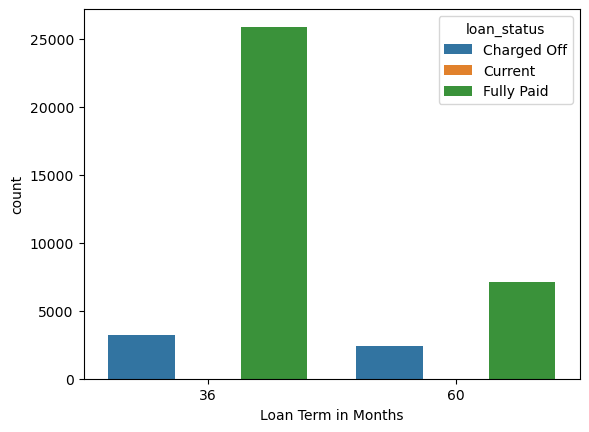

In [279]:
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

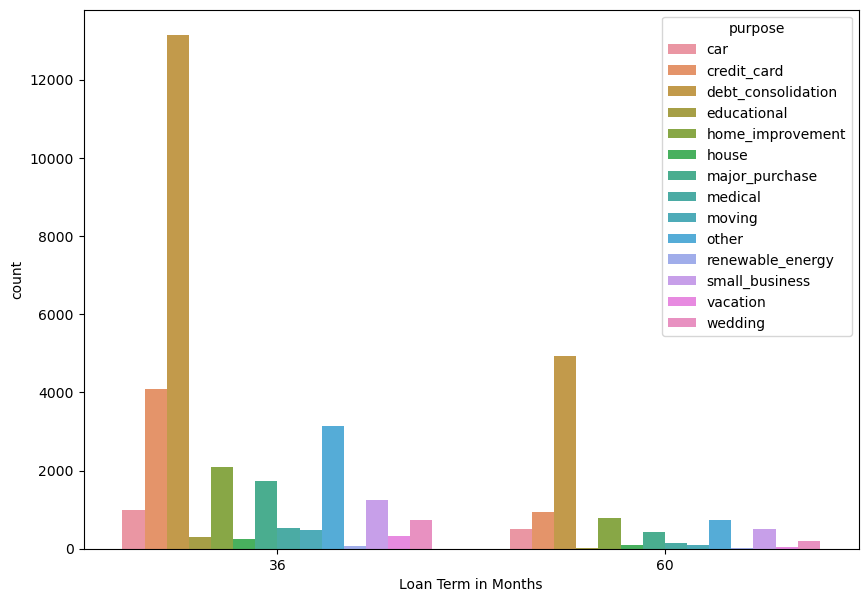

In [280]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

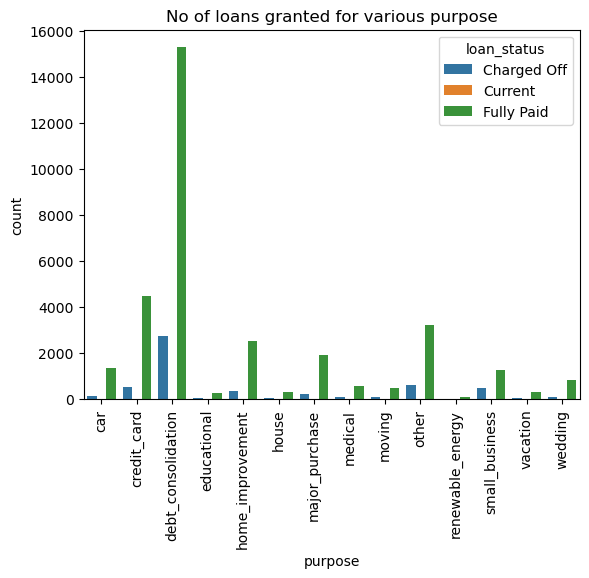

In [281]:
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

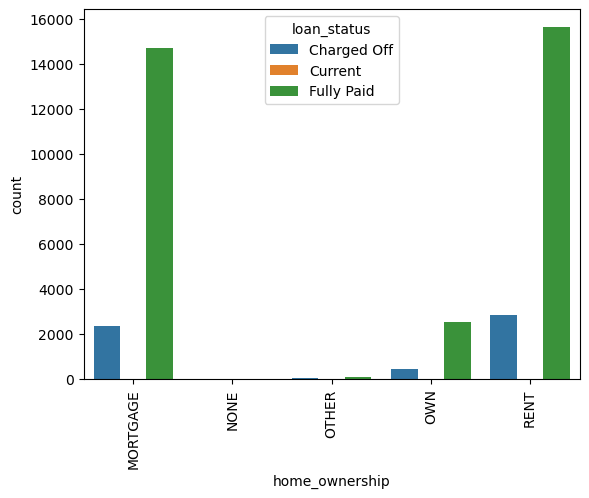

In [282]:
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

In [283]:
#Bivariate Plots

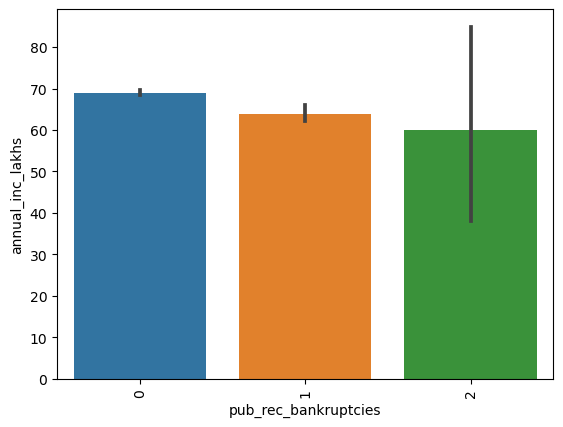

In [284]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

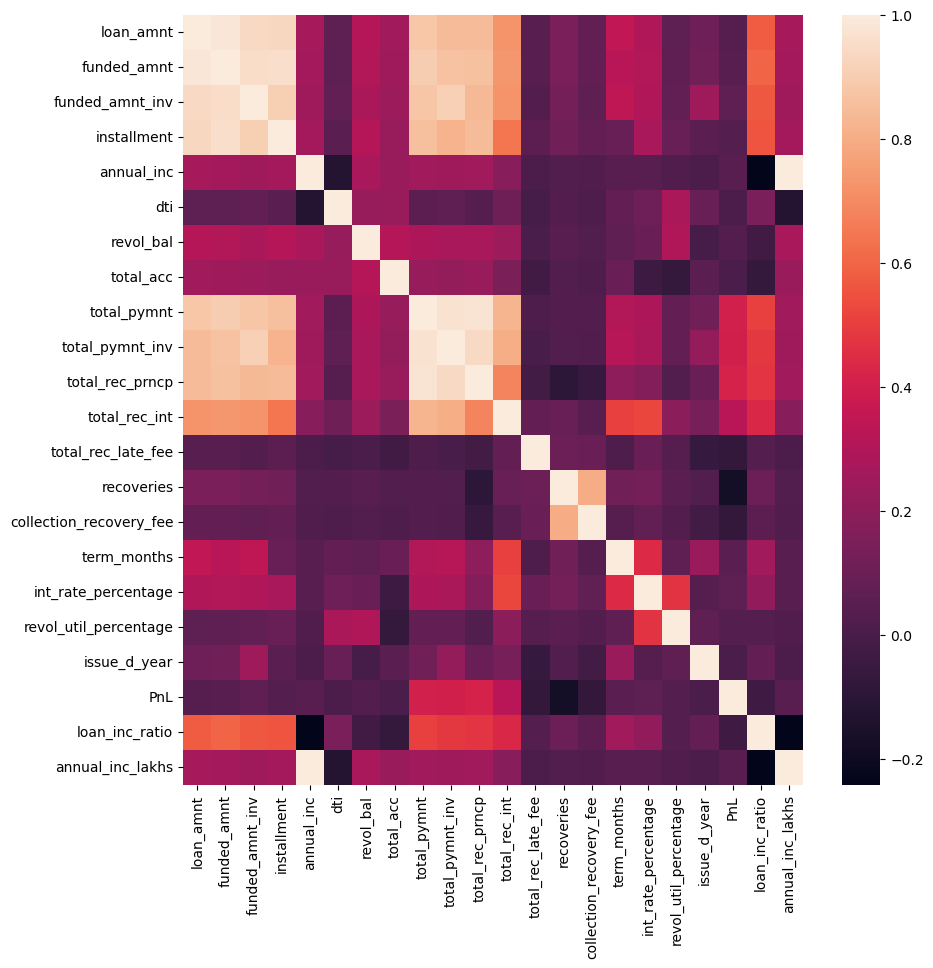

In [285]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

In [286]:
del numeric_data['out_prncp']
del numeric_data['out_prncp_inv']

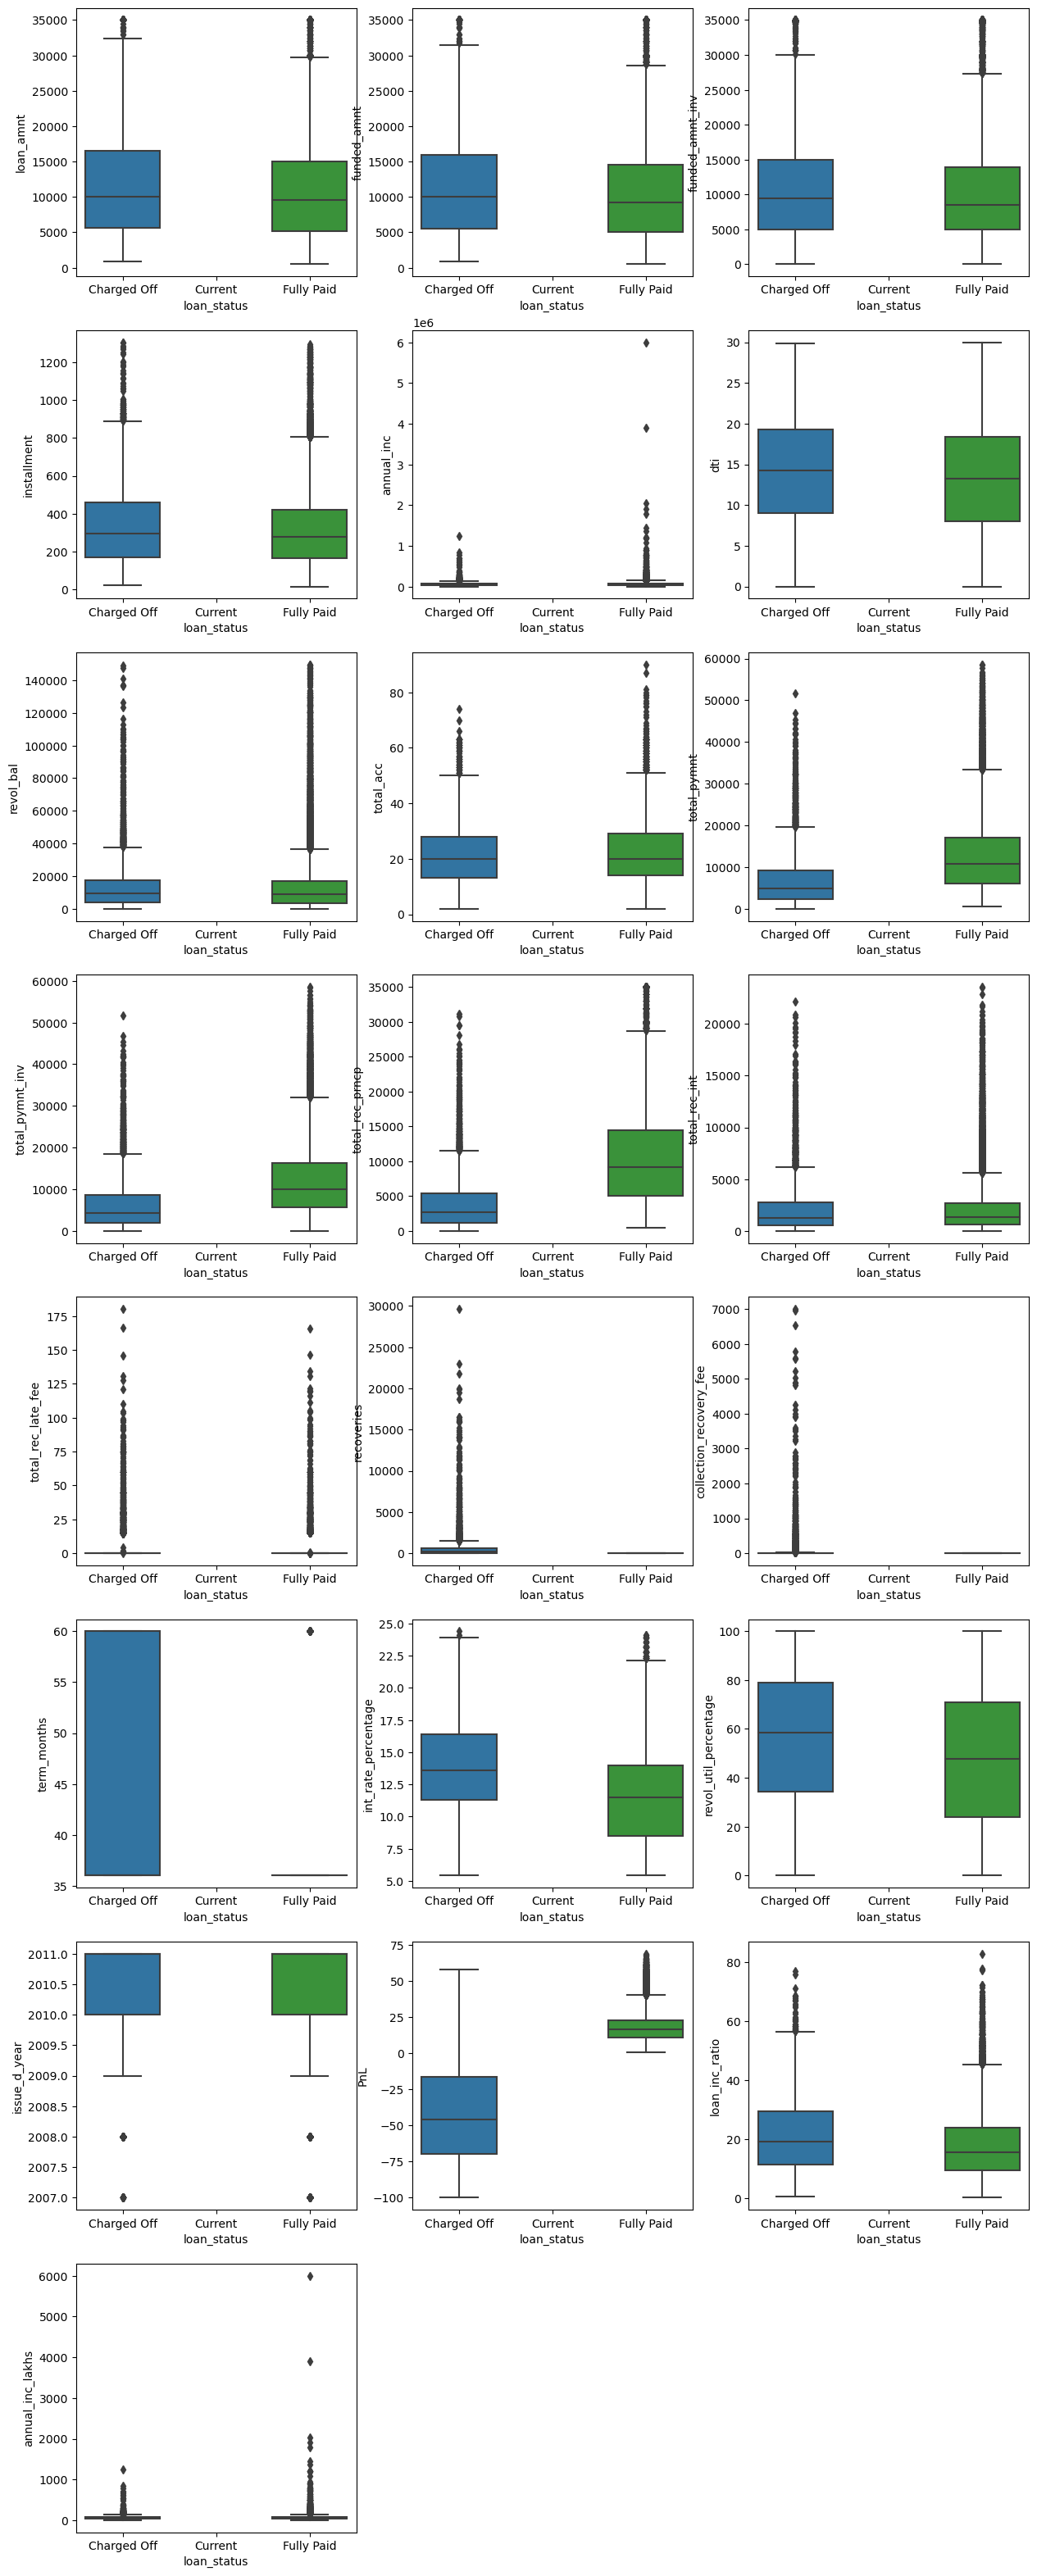

In [287]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=df)

plt.show()

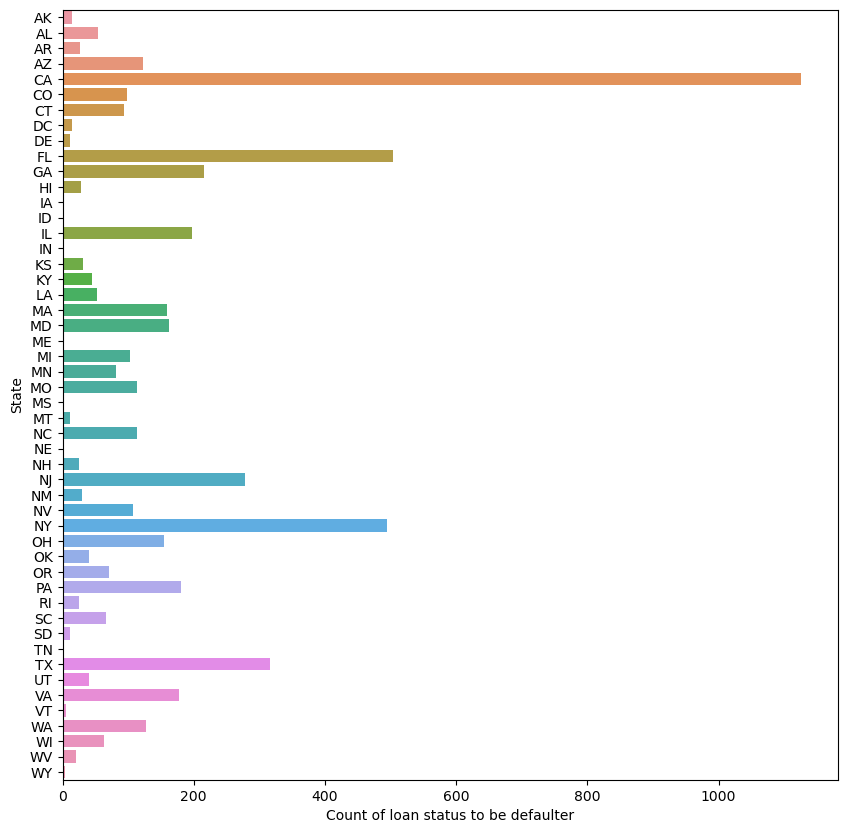

In [288]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

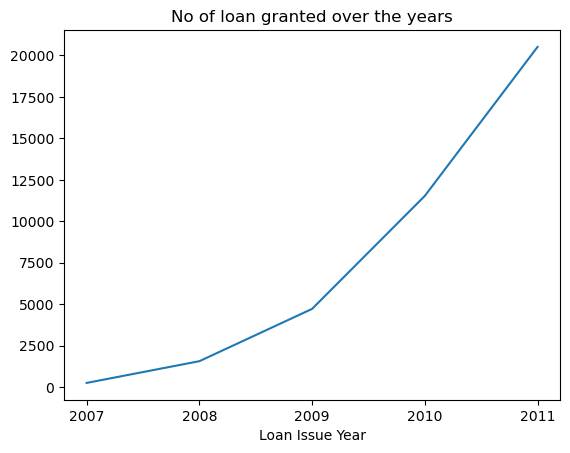

In [289]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

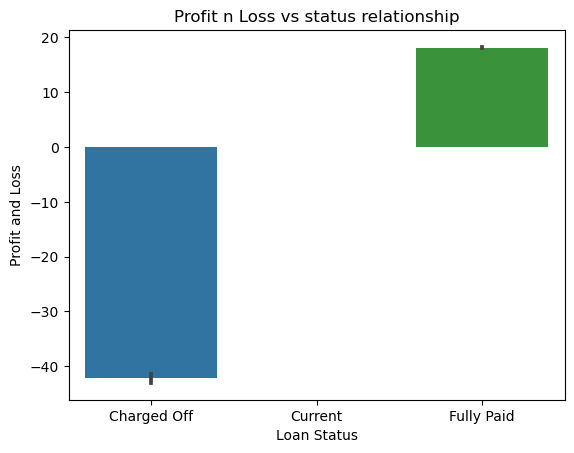

In [290]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='PnL',data=df)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

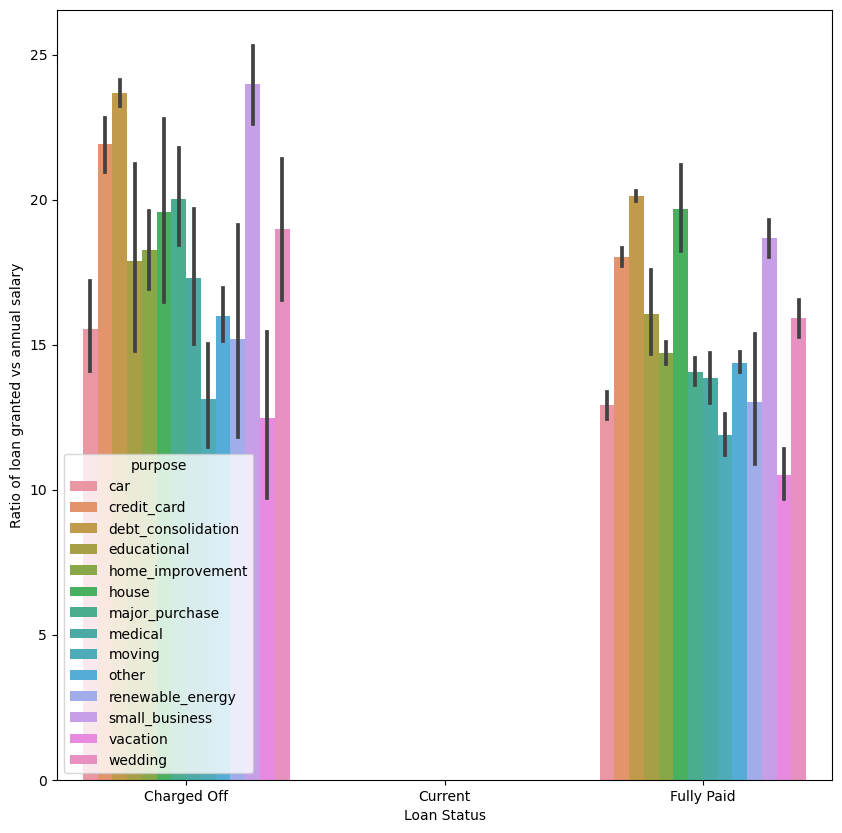

In [291]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

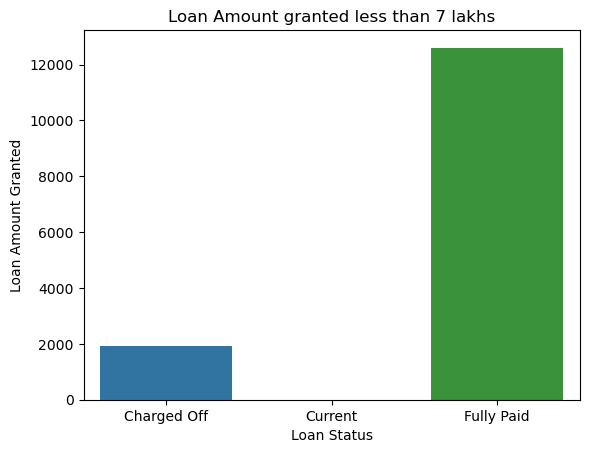

In [292]:
df_agg = df[df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()